### GitHub repository Link 

In [ ]:
https://github.com/ashishkushwaha2022/Advance_Regression_Assignment.git

# Model Building Workflow

Step 1: Reading and Understanding the Data

    1.1 Load Data
    
    2.2 Visualize Data

Step 2: Data Cleansing  

Step 3: Data Preparation

Step 4: Model Building & Evaluation 


Target Variable: SalePrice

## Step 1: Reading and Understanding the Data

In [986]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [987]:
# load Data
housing = pd.read_csv(r'C:\Users\jk507e\Downloads\Advance Regression Live Session\Advance Regression Assignment\train.csv')

In [988]:
# Look into the data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [989]:
# Check data type and null values
housing.info()

# Summary of the dataset
# 1460 entries
# 81 columns ( mix of int64,float64,object)
# Missing value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [990]:
# Check data distribution
housing.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualising the Data

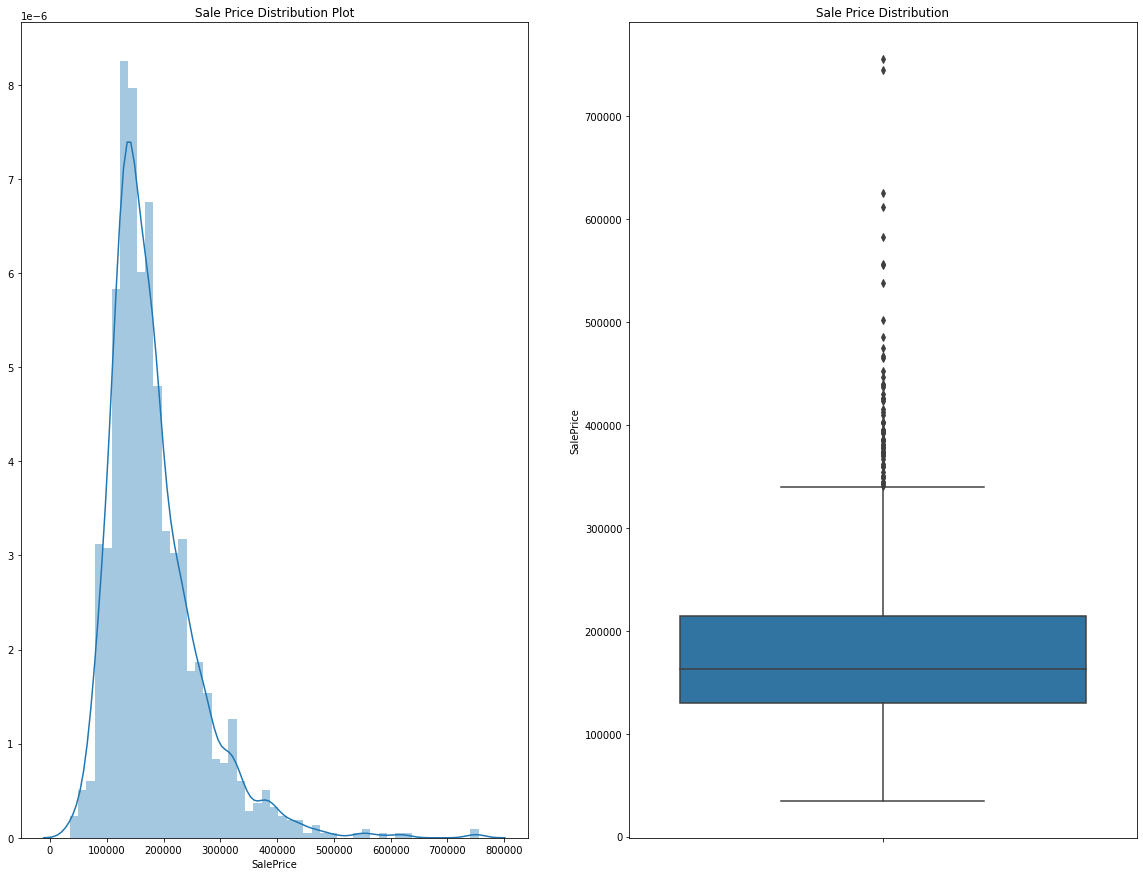

In [991]:
##### Understanding SalePrice distribution
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(housing.SalePrice)

plt.subplot(1,2,2)
plt.title('Sale Price Distribution')
sns.boxplot(y=housing.SalePrice)

plt.show()

In [992]:
print(housing.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.99,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
99%      442567.010000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Inferences on Sale Price-

- Difference between mean and median. The data is right skewed
- 75% of the house has selling price less than 214000
- Only 1% of the house are priced more than 442567

<AxesSubplot:>

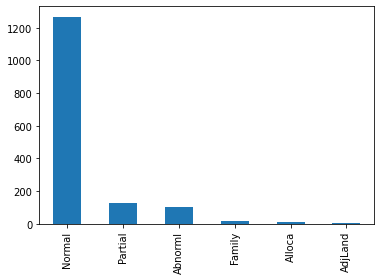

In [993]:
housing['SaleType'].astype('category').value_counts().plot.bar()
housing['SaleCondition'].astype('category').value_counts().plot.bar()

<AxesSubplot:>

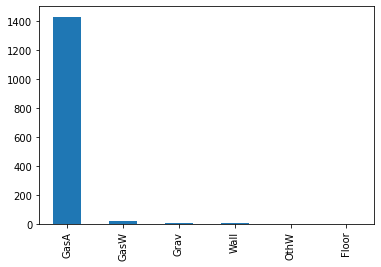

In [994]:
housing['Heating'].astype('category').value_counts().plot.bar()

<AxesSubplot:>

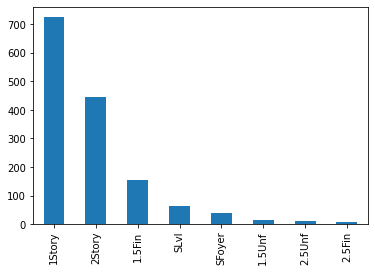

In [995]:
housing['HouseStyle'].astype('category').value_counts().plot.bar()

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. To check that first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [996]:
# Filter all numeric variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [997]:
# Convert integer Categorical columns into object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing.info()

# Drop Id column
housing.drop(['Id'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [998]:
# scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(housing_numeric)
#plt.show()

#Commented temporily as it is taking huge time to plot chart.

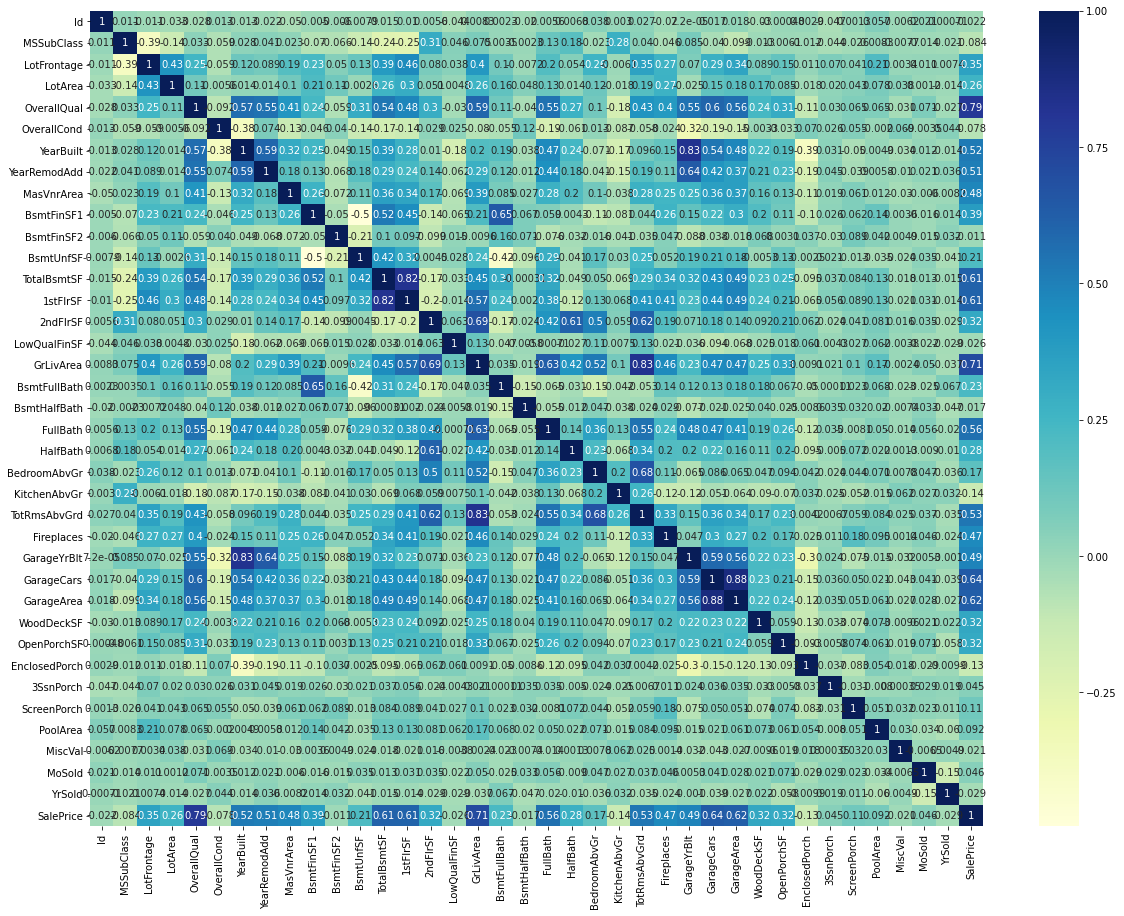

In [999]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(20,15))
# heatmap
sns.heatmap(housing_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

##### Insights from Heatmap
1. SalePrice is positively correlated with many variables such as OverallQual, OverallCond, YearBuilt etc.
2. Some varibales looks like following the linear behaviour with SalePrice
3. Correlation among independent variables:Many independent variables are highly correlated


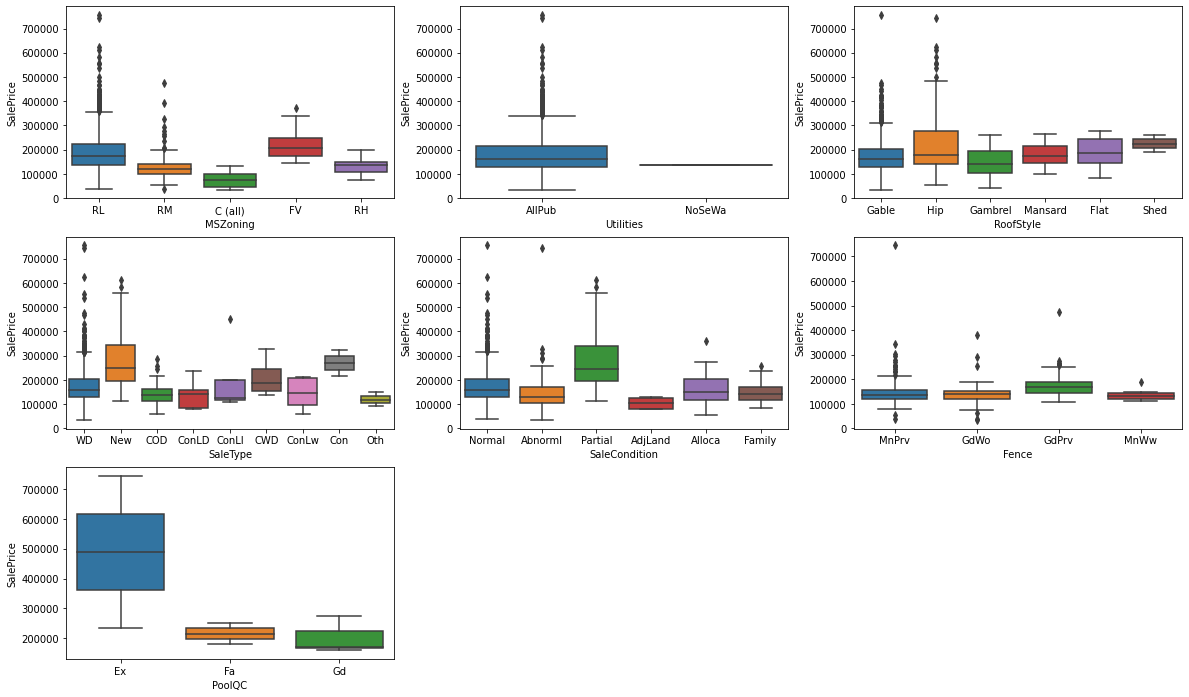

In [1000]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x= 'MSZoning',y = 'SalePrice',data = housing)
plt.subplot(3,3,2)
sns.boxplot(x= 'Utilities',y = 'SalePrice',data = housing)
plt.subplot(3,3,3)
sns.boxplot(x= 'RoofStyle',y = 'SalePrice',data = housing)
plt.subplot(3,3,4)
sns.boxplot(x= 'SaleType',y = 'SalePrice',data = housing)
plt.subplot(3,3,5)
sns.boxplot(x= 'SaleCondition',y = 'SalePrice',data = housing)
plt.subplot(3,3,6)
sns.boxplot(x= 'Fence',y = 'SalePrice',data = housing)
plt.subplot(3,3,7)
sns.boxplot(x= 'PoolQC',y = 'SalePrice',data = housing)
plt.show()

Insights from Box Plot
- House with Excellent pool quality has much higher price
- House just constructed and sold has higher price than old property

## Step 2: Data Cleansing

In [1001]:
# Drop duplicates rows if there are any
housing.drop_duplicates() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [1002]:
# Check for null columns
housing.isnull().sum()>0

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [1003]:
# Outliers Analysis
housing.describe()

# SalePrice and many other columns has outliers and mean and median has large difference.
# But its not a better idea to drop outliers and they are important in this case. Also dataset volume is low.

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Imputation

In [1004]:
# Check columns which have null values
(housing.isnull().sum()>0).sum()

19

In [1005]:
housing.columns[housing.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1006]:

# Drop variable PoolQC as PoolArea gives an idea about pool present or not present. PoolQC has high missing values
housing.drop(['PoolQC'], axis = 1, inplace = True)

# Drop variables which has high % of NA values
housing.drop(['Alley'], axis = 1, inplace = True)
housing.drop(['MiscFeature'], axis = 1, inplace = True) 


In [1007]:
# Many columns has "NA" entries but by looking into data dictionary, it is clear that they represent 
# "Not Applicaiton" but not "Not Available". Replace "NA" with "NO" for better understanding

# Replace NA with most appropriate value for that column
housing.LotFrontage.fillna(housing.LotFrontage.median(),inplace = True)
housing.MasVnrType.fillna('None',inplace = True)
housing.MasVnrArea.fillna(0,inplace = True)

#NA represents 'No basement' as per data dictionary which is a valid values. To avoid confusion between missing value
#and basement not present, better to represent 'No Basement'  with some other text like 'NO'
housing.BsmtQual.fillna('NO',inplace = True)
housing.BsmtCond.fillna('NO',inplace = True)
housing.BsmtExposure.fillna('NO',inplace = True)
housing.BsmtFinType1.fillna('NO',inplace = True)
housing.BsmtFinType2.fillna('NO',inplace = True)

#NA represent No Fireplace or No Garage hence replace NA with 'NO' to avoid confusion
housing.Electrical.fillna('NO',inplace = True)
housing.FireplaceQu.fillna('NO',inplace = True)
housing.GarageType.fillna('NO',inplace = True)
housing.GarageYrBlt.fillna(housing.GarageYrBlt.median(),inplace = True)
housing.GarageFinish.fillna('NO',inplace = True)
housing.GarageQual.fillna('NO',inplace = True)
housing.GarageCond.fillna('NO',inplace = True)
housing.Fence.fillna('NO',inplace = True)


In [1008]:
# Check data type and null values
housing.info()

# All variables have 1460 non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [1009]:
# Check columns which have null values
(housing.isnull().sum()>0).sum()

# All missing values are imputed with appropriate values

0

###  Step 3: Data Preparation

In [1010]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition']]

y = housing['SalePrice']

In [1011]:
print(X.shape)
print(y.shape)

# Data has 76 independent varibale before creating dummy variables

(1460, 76)
(1460,)


In [1012]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

# There are 41 categorical variables

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,NO,Attchd,RFn,TA,TA,Y,NO,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,TA,Attchd,RFn,TA,TA,Y,NO,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NO,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NO,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NO,WD,Normal


In [1013]:
housing_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1014]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1015]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [1016]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [1017]:
X.shape

# After creating dummy variables, there are 264 independent variables.

(1460, 264)

#### Scaling

In [1018]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after scaling the df is converted to a numpy array
cols = X.columns

#Scaling 
X = pd.DataFrame(scale(X))

#Reassign col names
X.columns = cols


In [1019]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=264)

#### Test-Train Splitting of Data

In [1020]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [1021]:
X_train.shape

(1021, 264)

In [1022]:
y_train.shape

(1021,)

In [1023]:
X_test.shape

(438, 264)

In [1024]:
y_test.shape

(438,)

### Step 4:  Model Building and Evaluation

In [1025]:
### Define function to calculate model scores
from RegscorePy import *
def reg_model_sc(y, y_pred, fea, n_data):
    aic_m = aic.aic(y, y_pred, fea)
    bic_m = bic.bic(y, y_pred, fea)
    rss = np.sum(np.square(y - y_pred))
    tss = np.sum(np.square(y - y.mean()))
    R_square = 1-(rss/tss)
    adjusted_R2 = 1 - (1-R_square)*((n_data-1)/(n_data-fea-1))
    return aic_m, bic_m, R_square

### A. Model Using Ridge Regression

##### scoring = neg_mean_absolute_error

In [1026]:
# list of alphas to tune vs neg_mean_absolute_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1027]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Ridge(alpha=500)
26
-18784.508307076856


In [1028]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010168,0.000401,0.003392,0.000489,0.0001,{'alpha': 0.0001},-20043.649610,-21013.050843,-21741.763558,-21926.437513,...,-20652.311820,1247.950046,28,-11653.608811,-11410.525313,-11842.925032,-12002.101549,-11548.927354,-11691.617612,209.815285
1,0.010172,0.000974,0.003399,0.000488,0.001,{'alpha': 0.001},-20042.876499,-21012.608605,-21741.008320,-21925.194045,...,-20651.600596,1247.730120,27,-11653.587454,-11410.524057,-11842.852353,-12002.048373,-11548.874445,-11691.577336,209.797372
2,0.010173,0.000383,0.003402,0.000498,0.01,{'alpha': 0.01},-20035.155234,-21008.243520,-21733.478360,-21912.787863,...,-20644.513229,1245.543093,26,-11653.375618,-11410.510369,-11842.127045,-12001.514979,-11548.346108,-11691.174824,209.618197
3,0.010996,0.001597,0.003792,0.000955,0.05,{'alpha': 0.05},-20001.057244,-20990.016457,-21700.492230,-21858.434572,...,-20613.572528,1236.119978,25,-11652.469715,-11410.443059,-11838.935140,-11999.176027,-11546.606595,-11689.526107,208.754709
4,0.009387,0.001364,0.003385,0.000491,0.1,{'alpha': 0.1},-19958.943717,-20969.579098,-21660.311769,-21792.993403,...,-20576.238042,1225.144244,24,-11651.561911,-11410.361960,-11835.041651,-11996.605399,-11544.844181,-11687.683020,207.731674
5,0.010961,0.001670,0.003796,0.001159,0.2,{'alpha': 0.2},-19880.530593,-20934.814249,-21587.614753,-21666.675884,...,-20506.584466,1205.390220,23,-11650.137355,-11410.066761,-11828.201046,-11992.853633,-11542.831818,-11684.818123,206.056165
6,0.010149,0.000411,0.003214,0.000388,0.3,{'alpha': 0.3},-19805.586854,-20906.094246,-21525.890319,-21545.330303,...,-20442.248377,1188.897537,22,-11649.437753,-11409.932492,-11822.758893,-11989.799158,-11543.123876,-11683.010435,204.409339
7,0.010965,0.001267,0.003390,0.000797,0.4,{'alpha': 0.4},-19736.114421,-20881.725145,-21468.259488,-21436.398240,...,-20383.383666,1175.505788,21,-11649.742580,-11409.650929,-11818.568338,-11988.139235,-11544.589725,-11682.138162,203.208360
8,0.010571,0.000488,0.003192,0.000399,0.5,{'alpha': 0.5},-19675.578259,-20860.594218,-21413.403156,-21332.401073,...,-20328.684897,1163.061266,20,-11650.872339,-11409.252808,-11815.124549,-11986.790263,-11547.288228,-11681.865637,202.052658
9,0.010757,0.000760,0.002607,0.000500,0.6,{'alpha': 0.6},-19621.555459,-20841.940443,-21361.058381,-21236.085329,...,-20277.998443,1152.138698,19,-11652.901037,-11408.765186,-11812.540664,-11985.650980,-11550.460591,-11682.063692,201.023079


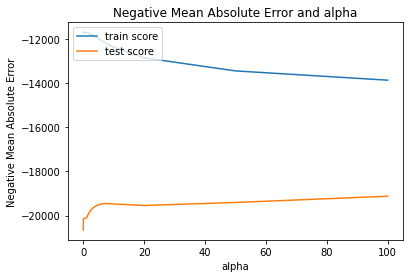

In [1029]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimum Alpha = 20

In [1030]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.87284610e+02,  5.62209751e+03,  1.11003588e+04,  5.11977073e+03,
        7.05492297e+03,  2.38233860e+03,  3.72230108e+03,  3.12658184e+03,
        1.22771732e+03,  5.51531069e+02,  4.25749523e+03,  6.87328456e+03,
        1.50972560e+04, -1.17215637e+03,  1.74897399e+04,  2.92532103e+03,
        1.94055025e+02,  3.00350029e+03, -1.80458391e+02, -1.66518373e+03,
       -2.58226173e+03,  1.04497896e+03,  1.03579566e+03, -1.23736670e+02,
        7.77620498e+03, -7.48624120e+02,  1.26780941e+03,  9.29012371e+02,
        1.60020973e+02,  8.52381732e+02,  1.20318643e+03,  1.04812491e+03,
        1.25273622e+02, -2.69789794e+02, -9.00425875e+02,  6.50514194e+02,
       -1.31267431e+01, -6.70817859e+02, -7.94794314e+01, -1.37471516e+03,
        1.99756741e+02,  9.90791725e+02, -9.76481199e+02, -8.61554515e+02,
       -1.34595359e+03, -2.36041614e+03, -2.29314704e+03, -7.96646677e+02,
       -1.23988824e+03,  1.97483737e+03,  1.07828097e+03,  4.71609486e+03,
        3.20374674e+03,  

In [1031]:
num_fea_ridge = len([i for i, e in enumerate(coeffs) if e != 0])
print(num_fea_ridge)

134


In [1032]:
ridge.coef_.max()

34282.15521374278

In [1033]:
y_train_pred_ridge = ridge.predict(X_train)
df_pred_compare_ridge = pd.DataFrame(y_train)
df_pred_compare_ridge['Price_Pred'] = y_train_pred_ridge
df_pred_compare_ridge

,SalePrice,Price_Pred
210,98000,84633.839757
318,260000,335109.082903
239,113000,133545.685029
986,117000,125293.922735
1416,122500,135777.801459
...,...,...
1009,102000,113523.948498
802,189000,191654.652442
53,385000,397757.878950
350,318061,306465.559746


##### scoring = neg_mean_squared_error

In [1034]:
# list of alphas to tune vs neg_mean_squared_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1035]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Ridge(alpha=500)
26
-1244695212.4776936


In [1036]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011961,0.000632,0.003598,0.000801,0.0001,{'alpha': 0.0001},-8.334984e+08,-3.323760e+09,-1.823925e+09,-4.052118e+09,...,-2.170566e+09,1.311739e+09,28,-2.758940e+08,-2.854719e+08,-2.888429e+08,-2.981363e+08,-2.650724e+08,-2.826835e+08,1.132034e+07
1,0.009979,0.000625,0.003793,0.000739,0.001,{'alpha': 0.001},-8.334287e+08,-3.323710e+09,-1.823781e+09,-4.051282e+09,...,-2.170344e+09,1.311515e+09,27,-2.758940e+08,-2.854719e+08,-2.888429e+08,-2.981363e+08,-2.650724e+08,-2.826835e+08,1.132034e+07
2,0.010770,0.000740,0.002995,0.000009,0.01,{'alpha': 0.01},-8.327342e+08,-3.323215e+09,-1.822347e+09,-4.042946e+09,...,-2.168132e+09,1.309277e+09,26,-2.758945e+08,-2.854721e+08,-2.888434e+08,-2.981367e+08,-2.650728e+08,-2.826839e+08,1.132034e+07
3,0.010776,0.000745,0.003591,0.001196,0.05,{'alpha': 0.05},-8.297003e+08,-3.321137e+09,-1.816065e+09,-4.006297e+09,...,-2.158438e+09,1.299487e+09,25,-2.759052e+08,-2.854753e+08,-2.888541e+08,-2.981462e+08,-2.650814e+08,-2.826924e+08,1.132028e+07
4,0.012168,0.000749,0.003593,0.000490,0.1,{'alpha': 0.1},-8.260247e+08,-3.318778e+09,-1.808420e+09,-3.961381e+09,...,-2.146621e+09,1.287599e+09,24,-2.759381e+08,-2.854838e+08,-2.888868e+08,-2.981749e+08,-2.651076e+08,-2.827182e+08,1.132000e+07
5,0.010975,0.001098,0.003187,0.000394,0.2,{'alpha': 0.2},-8.190386e+08,-3.314663e+09,-1.793770e+09,-3.874391e+09,...,-2.123910e+09,1.264909e+09,23,-2.760643e+08,-2.855096e+08,-2.890121e+08,-2.982854e+08,-2.652093e+08,-2.828161e+08,1.131839e+07
6,0.010764,0.000746,0.004400,0.000782,0.3,{'alpha': 0.3},-8.125034e+08,-3.311122e+09,-1.779908e+09,-3.790964e+09,...,-2.102312e+09,1.243558e+09,22,-2.762647e+08,-2.855414e+08,-2.892104e+08,-2.984609e+08,-2.653720e+08,-2.829699e+08,1.131525e+07
7,0.010967,0.001083,0.003792,0.000743,0.4,{'alpha': 0.4},-8.063826e+08,-3.307980e+09,-1.766763e+09,-3.710864e+09,...,-2.081721e+09,1.223438e+09,21,-2.765325e+08,-2.855755e+08,-2.894744e+08,-2.986957e+08,-2.655905e+08,-2.831737e+08,1.131082e+07
8,0.010736,0.000688,0.003736,0.000742,0.5,{'alpha': 0.5},-8.006444e+08,-3.305125e+09,-1.754274e+09,-3.633890e+09,...,-2.062051e+09,1.204460e+09,20,-2.768615e+08,-2.856103e+08,-2.897978e+08,-2.989848e+08,-2.658604e+08,-2.834230e+08,1.130564e+07
9,0.010413,0.000476,0.003384,0.000458,0.6,{'alpha': 0.6},-7.952607e+08,-3.302487e+09,-1.742391e+09,-3.559858e+09,...,-2.043235e+09,1.186548e+09,19,-2.772463e+08,-2.856449e+08,-2.901751e+08,-2.993237e+08,-2.661775e+08,-2.837135e+08,1.130042e+07


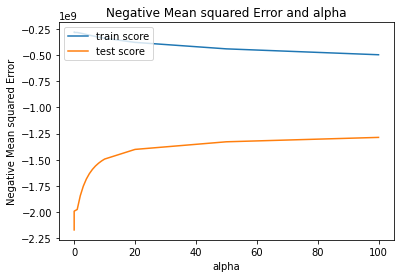

In [1037]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean squared Error')
plt.title("Negative Mean squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimum Alpha = 20

In [1038]:
# list of alphas to tune vs R2
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1039]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Ridge(alpha=500)
26
0.8093577282761965


In [1040]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011365,0.001850,0.003390,0.000491,0.0001,{'alpha': 0.0001},0.840068,0.553617,0.692851,0.224506,...,0.639816,0.238513,28,0.957534,0.951920,0.954348,0.954145,0.955656,0.954721,0.001849
1,0.010769,0.000746,0.003400,0.000491,0.001,{'alpha': 0.001},0.840081,0.553624,0.692875,0.224666,...,0.639857,0.238460,27,0.957534,0.951920,0.954348,0.954145,0.955656,0.954721,0.001849
2,0.011770,0.001163,0.003597,0.000484,0.01,{'alpha': 0.01},0.840214,0.553690,0.693117,0.226261,...,0.640267,0.237936,26,0.957534,0.951920,0.954348,0.954144,0.955656,0.954720,0.001849
3,0.011564,0.001354,0.004085,0.001003,0.05,{'alpha': 0.05},0.840796,0.553969,0.694175,0.233275,...,0.642066,0.235635,25,0.957532,0.951920,0.954346,0.954143,0.955654,0.954719,0.001849
4,0.010947,0.000746,0.003027,0.000054,0.1,{'alpha': 0.1},0.841502,0.554286,0.695462,0.241871,...,0.644260,0.232824,24,0.957527,0.951918,0.954341,0.954139,0.955650,0.954715,0.001848
5,0.010648,0.001628,0.003628,0.000757,0.2,{'alpha': 0.2},0.842842,0.554839,0.697929,0.258519,...,0.648484,0.227407,23,0.957508,0.951914,0.954321,0.954122,0.955633,0.954700,0.001844
6,0.009083,0.000470,0.002996,0.000018,0.3,{'alpha': 0.3},0.844096,0.555314,0.700263,0.274485,...,0.652507,0.222247,22,0.957477,0.951908,0.954290,0.954095,0.955606,0.954675,0.001836
7,0.009426,0.000815,0.003110,0.000191,0.4,{'alpha': 0.4},0.845271,0.555736,0.702477,0.289815,...,0.656347,0.217327,21,0.957436,0.951903,0.954248,0.954059,0.955569,0.954643,0.001826
8,0.010659,0.000424,0.003410,0.000492,0.5,{'alpha': 0.5},0.846372,0.556120,0.704580,0.304546,...,0.660019,0.212632,20,0.957385,0.951897,0.954197,0.954014,0.955524,0.954603,0.001812
9,0.010511,0.000334,0.003590,0.000486,0.6,{'alpha': 0.6},0.847405,0.556474,0.706581,0.318714,...,0.663534,0.208150,19,0.957326,0.951891,0.954138,0.953962,0.955471,0.954557,0.001797


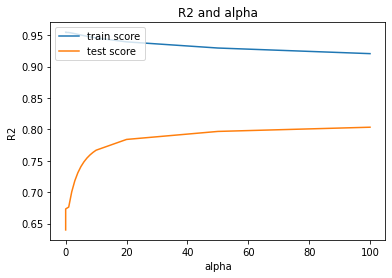

In [1041]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimum Aplha = 20

All scoring paramter gave optimum alpha of 20

In [1042]:
Ridge_model_score = reg_model_sc(y_train, y_train_pred_ridge, num_fea_ridge, 1021)

In [1043]:
print( "The AIC score for Ridge model              :- ", Ridge_model_score[0])
print( "The BIC score for Ridge model              :- ", Ridge_model_score[1])
print( "The Adjusted R2 score for Ridge model      :- ", Ridge_model_score[2])

The AIC score for Ridge model              :-  20511.825607303534
The BIC score for Ridge model              :-  21172.2496749376
The Adjusted R2 score for Ridge model      :-  0.9346705104902571


##### Ridge modeling with doubling the value of aplha

In [1044]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.66017225e+02,  5.03685742e+03,  1.13971074e+04,  4.65518984e+03,
        5.45887575e+03,  2.67178351e+03,  3.80411962e+03,  2.25240832e+03,
        1.17416030e+03,  5.83022488e+02,  3.36068908e+03,  6.75321985e+03,
        1.29285928e+04, -1.07631089e+03,  1.56087213e+04,  3.18476089e+03,
        2.63807386e+02,  3.73241826e+03,  4.34019099e+02, -1.45036730e+03,
       -2.53819513e+03,  1.97068189e+03,  1.39811250e+03, -1.38279509e+02,
        7.71211598e+03, -2.36044179e+02,  1.32282689e+03,  8.76243205e+02,
        1.65313395e+02,  9.05851065e+02,  1.27539747e+03,  4.25557903e+02,
        6.25086454e+01, -2.41840233e+02, -8.92358808e+02,  3.69887525e+02,
       -1.17479978e+01, -5.57761655e+02, -1.55982670e+02, -1.76774791e+03,
        5.46958093e+01,  1.22853817e+03, -9.99807065e+02, -6.95083249e+02,
       -1.31113249e+03, -2.53920933e+03, -2.48261197e+03, -7.65503982e+02,
       -1.27758706e+03,  1.27590256e+03,  7.21204720e+02,  3.21847489e+03,
        1.87536407e+03,  

In [1045]:
coeffs = ridge.coef_
num_fea_ridge = len([i for i, e in enumerate(coeffs) if e != 0])
print(num_fea_ridge)

261


In [1046]:
y_train_pred_ridge = ridge.predict(X_train)
df_pred_compare_ridge = pd.DataFrame(y_train)
df_pred_compare_ridge['Price_Pred'] = y_train_pred_ridge
df_pred_compare_ridge

,SalePrice,Price_Pred
210,98000,80766.418911
318,260000,335049.462677
239,113000,134502.956967
986,117000,123918.702987
1416,122500,134772.939624
...,...,...
1009,102000,116179.770119
802,189000,193637.033935
53,385000,394281.316034
350,318061,301090.951922


In [1047]:
# list of alphas to tune vs neg_mean_squared_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1048]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Ridge(alpha=500)
26
-1244695212.4776936


In [1049]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010760,0.001326,0.003789,0.000745,0.0001,{'alpha': 0.0001},-8.334984e+08,-3.323760e+09,-1.823925e+09,-4.052118e+09,...,-2.170566e+09,1.311739e+09,28,-2.758940e+08,-2.854719e+08,-2.888429e+08,-2.981363e+08,-2.650724e+08,-2.826835e+08,1.132034e+07
1,0.011367,0.000796,0.002996,0.000019,0.001,{'alpha': 0.001},-8.334287e+08,-3.323710e+09,-1.823781e+09,-4.051282e+09,...,-2.170344e+09,1.311515e+09,27,-2.758940e+08,-2.854719e+08,-2.888429e+08,-2.981363e+08,-2.650724e+08,-2.826835e+08,1.132034e+07
2,0.011768,0.000742,0.004192,0.001156,0.01,{'alpha': 0.01},-8.327342e+08,-3.323215e+09,-1.822347e+09,-4.042946e+09,...,-2.168132e+09,1.309277e+09,26,-2.758945e+08,-2.854721e+08,-2.888434e+08,-2.981367e+08,-2.650728e+08,-2.826839e+08,1.132034e+07
3,0.011572,0.001743,0.004392,0.001018,0.05,{'alpha': 0.05},-8.297003e+08,-3.321137e+09,-1.816065e+09,-4.006297e+09,...,-2.158438e+09,1.299487e+09,25,-2.759052e+08,-2.854753e+08,-2.888541e+08,-2.981462e+08,-2.650814e+08,-2.826924e+08,1.132028e+07
4,0.010973,0.001538,0.003993,0.000631,0.1,{'alpha': 0.1},-8.260247e+08,-3.318778e+09,-1.808420e+09,-3.961381e+09,...,-2.146621e+09,1.287599e+09,24,-2.759381e+08,-2.854838e+08,-2.888868e+08,-2.981749e+08,-2.651076e+08,-2.827182e+08,1.132000e+07
5,0.009775,0.000748,0.003792,0.001162,0.2,{'alpha': 0.2},-8.190386e+08,-3.314663e+09,-1.793770e+09,-3.874391e+09,...,-2.123910e+09,1.264909e+09,23,-2.760643e+08,-2.855096e+08,-2.890121e+08,-2.982854e+08,-2.652093e+08,-2.828161e+08,1.131839e+07
6,0.009155,0.001714,0.003029,0.000137,0.3,{'alpha': 0.3},-8.125034e+08,-3.311122e+09,-1.779908e+09,-3.790964e+09,...,-2.102312e+09,1.243558e+09,22,-2.762647e+08,-2.855414e+08,-2.892104e+08,-2.984609e+08,-2.653720e+08,-2.829699e+08,1.131525e+07
7,0.010572,0.000411,0.003130,0.000464,0.4,{'alpha': 0.4},-8.063826e+08,-3.307980e+09,-1.766763e+09,-3.710864e+09,...,-2.081721e+09,1.223438e+09,21,-2.765325e+08,-2.855755e+08,-2.894744e+08,-2.986957e+08,-2.655905e+08,-2.831737e+08,1.131082e+07
8,0.009614,0.000908,0.003348,0.000238,0.5,{'alpha': 0.5},-8.006444e+08,-3.305125e+09,-1.754274e+09,-3.633890e+09,...,-2.062051e+09,1.204460e+09,20,-2.768615e+08,-2.856103e+08,-2.897978e+08,-2.989848e+08,-2.658604e+08,-2.834230e+08,1.130564e+07
9,0.009775,0.000578,0.003206,0.000739,0.6,{'alpha': 0.6},-7.952607e+08,-3.302487e+09,-1.742391e+09,-3.559858e+09,...,-2.043235e+09,1.186548e+09,19,-2.772463e+08,-2.856449e+08,-2.901751e+08,-2.993237e+08,-2.661775e+08,-2.837135e+08,1.130042e+07


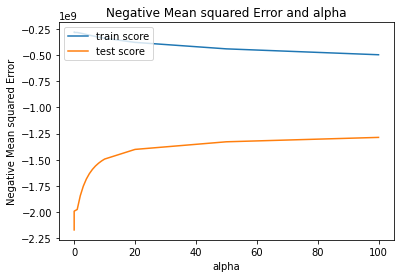

In [1050]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean squared Error')
plt.title("Negative Mean squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1051]:
# list of alphas to tune vs R2
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1052]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Ridge(alpha=500)
26
0.8093577282761965


In [1053]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011763,0.001712,0.003997,0.000621,0.0001,{'alpha': 0.0001},0.840068,0.553617,0.692851,0.224506,...,0.639816,0.238513,28,0.957534,0.951920,0.954348,0.954145,0.955656,0.954721,0.001849
1,0.010574,0.001622,0.003590,0.000495,0.001,{'alpha': 0.001},0.840081,0.553624,0.692875,0.224666,...,0.639857,0.238460,27,0.957534,0.951920,0.954348,0.954145,0.955656,0.954721,0.001849
2,0.011173,0.000989,0.003791,0.000732,0.01,{'alpha': 0.01},0.840214,0.553690,0.693117,0.226261,...,0.640267,0.237936,26,0.957534,0.951920,0.954348,0.954144,0.955656,0.954720,0.001849
3,0.011493,0.001109,0.003249,0.000383,0.05,{'alpha': 0.05},0.840796,0.553969,0.694175,0.233275,...,0.642066,0.235635,25,0.957532,0.951920,0.954346,0.954143,0.955654,0.954719,0.001849
4,0.008716,0.000836,0.003213,0.000393,0.1,{'alpha': 0.1},0.841502,0.554286,0.695462,0.241871,...,0.644260,0.232824,24,0.957527,0.951918,0.954341,0.954139,0.955650,0.954715,0.001848


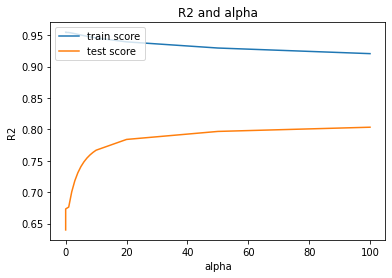

In [1054]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1055]:
Ridge_model_score = reg_model_sc(y_train, y_train_pred_ridge, num_fea_ridge, 1021)

In [1056]:
print( "The AIC score for Ridge model              :- ", Ridge_model_score[0])
print( "The BIC score for Ridge model              :- ", Ridge_model_score[1])
print( "The Adjusted R2 score for Ridge model      :- ", Ridge_model_score[2])

The AIC score for Ridge model              :-  20882.351655286264
The BIC score for Ridge model              :-  22168.700025827242
The Adjusted R2 score for Ridge model      :-  0.9267723657496009


### B. Model Using Lasso Regression

##### scoring = neg_mean_absolute_error

In [1057]:
# list of alphas to tune vs neg_mean_absolute_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1058]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 500}
Lasso(alpha=500)
26
-17681.113321598677


In [1059]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.203442,0.040781,0.002918,0.000161,0.0001,{'alpha': 0.0001},-20046.611693,-20989.320358,-21739.045445,-21901.259234,...,-20647.168047,1232.931695,28,-11652.305000,-11411.571687,-11842.352442,-12005.332035,-11548.978378,-11692.107908,210.453643
1,0.203323,0.028246,0.003004,0.000625,0.001,{'alpha': 0.001},-20046.558661,-20989.168998,-21738.977505,-21901.157256,...,-20647.088002,1232.904457,27,-11652.300672,-11411.569744,-11842.348741,-12005.331085,-11548.975742,-11692.105197,210.453872
2,0.205523,0.049174,0.002799,0.000403,0.01,{'alpha': 0.01},-20046.028351,-20987.655456,-21738.315319,-21900.136297,...,-20646.312094,1232.598847,26,-11652.270090,-11411.551677,-11842.312470,-12005.324735,-11548.957711,-11692.083336,210.455229
3,0.206500,0.040818,0.003184,0.000385,0.05,{'alpha': 0.05},-20043.671785,-20980.922733,-21735.597335,-21895.366453,...,-20642.968763,1231.051812,25,-11652.175604,-11411.508709,-11842.166477,-12005.306574,-11548.884658,-11692.008404,210.453951
4,0.224274,0.040860,0.003519,0.000433,0.1,{'alpha': 0.1},-20040.727013,-20972.499014,-21732.454808,-21888.188395,...,-20638.694498,1228.752013,24,-11652.069546,-11411.461139,-11842.025745,-12005.285638,-11548.800480,-11691.928509,210.455784
5,0.222964,0.033603,0.003587,0.000799,0.2,{'alpha': 0.2},-20034.892167,-20955.642759,-21726.576764,-21873.506929,...,-20630.391883,1223.792201,23,-11651.861361,-11411.469166,-11841.744537,-12005.253698,-11548.701214,-11691.805995,210.425435
6,0.201827,0.036895,0.003395,0.000788,0.3,{'alpha': 0.3},-20028.872886,-20938.814519,-21721.002429,-21858.771952,...,-20621.693004,1219.613842,22,-11651.638907,-11411.469774,-11841.463539,-12005.318835,-11548.597198,-11691.697651,210.427267
7,0.203965,0.027415,0.003388,0.000485,0.4,{'alpha': 0.4},-20022.988548,-20921.958148,-21715.460595,-21844.087540,...,-20611.984268,1217.223731,21,-11651.420525,-11411.476639,-11841.202788,-12005.432263,-11548.511974,-11691.608838,210.442084
8,0.199732,0.029635,0.003390,0.000799,0.5,{'alpha': 0.5},-20017.123887,-20905.172453,-21709.261263,-21830.198590,...,-20602.326044,1214.883810,20,-11651.203004,-11411.480074,-11840.925575,-12005.602242,-11548.418807,-11691.525940,210.473491
9,0.195036,0.026059,0.003189,0.000401,0.6,{'alpha': 0.6},-20011.362651,-20893.168763,-21702.827917,-21816.366423,...,-20593.622359,1212.729478,19,-11650.977414,-11411.369761,-11840.889205,-12005.654301,-11548.348414,-11691.447819,210.531448


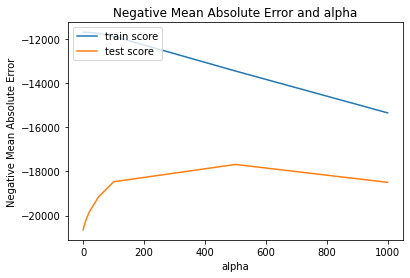

In [1060]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1061]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [1062]:
lasso.coef_

array([ 1.48667641e+03,  5.68406918e+03,  9.94095625e+03,  6.45892024e+03,
        1.12365633e+04,  2.30927544e+03,  3.81424164e+03,  6.34165331e+03,
        1.37651910e+03, -0.00000000e+00,  1.00236322e+04,  0.00000000e+00,
        7.19569781e+03, -2.64222643e+03,  3.02556080e+04,  1.54586051e+03,
       -2.40023212e+02,  9.04593323e+02, -1.11624874e+03, -2.87484502e+03,
       -3.69417512e+03, -0.00000000e+00,  9.12937166e+02,  8.19498374e+02,
        4.21628617e+03,  9.16037459e+02,  9.60339491e+02,  1.11395009e+03,
       -0.00000000e+00,  5.38285332e+02,  4.98608150e+02,  3.53559382e+03,
        1.06914397e+02, -4.49160470e+02, -5.29615711e+02,  9.82066132e+02,
        3.65884658e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.56250260e+02, -8.08232560e+01, -1.34612547e+02,
       -1.14715585e+03, -1.55369421e+03, -1.62266772e+03, -0.00000000e+00,
       -1.58038990e+03,  3.70157747e+02,  1.70859592e+02,  1.62215819e+03,
        0.00000000e+00,  

In [1063]:
coeffs = lasso.coef_

In [1064]:
coeffs.max()

83735.05273056068

In [1065]:
X_train.columns.size

264

In [1066]:
num_fea_lasso = len([i for i, e in enumerate(coeffs) if e != 0])
num_fea_lasso

202

In [1067]:
y_train_pred_lasso = lasso.predict(X_train)
df_pred_compare_lasso = pd.DataFrame(y_train)
df_pred_compare_lasso['Price_Pred'] = y_train_pred_lasso
df_pred_compare_lasso

,SalePrice,Price_Pred
210,98000,96222.486766
318,260000,330140.668830
239,113000,127769.662609
986,117000,124588.159043
1416,122500,131028.122454
...,...,...
1009,102000,100798.829160
802,189000,188384.079713
53,385000,406057.531281
350,318061,317696.253482


##### neg_mean_squared_error

In [1068]:
# list of alphas to tune vs neg_mean_squared_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1069]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 1000}
Lasso(alpha=1000)
27
-1279810687.9387712


In [1070]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191945,0.031071,0.003169,0.000934,0.0001,{'alpha': 0.0001},-8.335410e+08,-3.390889e+09,-1.830443e+09,-4.052967e+09,...,-2.186276e+09,1.322814e+09,28,-2.758956e+08,-2.854978e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826899e+08,1.132233e+07
1,0.213009,0.040908,0.003398,0.000474,0.001,{'alpha': 0.001},-8.335363e+08,-3.390810e+09,-1.830424e+09,-4.052947e+09,...,-2.186252e+09,1.322796e+09,27,-2.758956e+08,-2.854978e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826899e+08,1.132233e+07
2,0.196463,0.031497,0.003009,0.000026,0.01,{'alpha': 0.01},-8.334892e+08,-3.390017e+09,-1.830259e+09,-4.052749e+09,...,-2.186012e+09,1.322613e+09,26,-2.758956e+08,-2.854981e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826900e+08,1.132237e+07
3,0.212207,0.047784,0.002992,0.000610,0.05,{'alpha': 0.05},-8.332800e+08,-3.386501e+09,-1.829774e+09,-4.051866e+09,...,-2.185006e+09,1.321780e+09,25,-2.758957e+08,-2.854994e+08,-2.888449e+08,-2.981394e+08,-2.650726e+08,-2.826904e+08,1.132251e+07
4,0.190007,0.030541,0.003128,0.000271,0.1,{'alpha': 0.1},-8.330187e+08,-3.382116e+09,-1.829451e+09,-4.050744e+09,...,-2.183817e+09,1.320707e+09,24,-2.758957e+08,-2.855011e+08,-2.888452e+08,-2.981398e+08,-2.650727e+08,-2.826909e+08,1.132270e+07
5,0.191370,0.030756,0.003183,0.000738,0.2,{'alpha': 0.2},-8.325013e+08,-3.373206e+09,-1.829252e+09,-4.048516e+09,...,-2.181540e+09,1.318483e+09,23,-2.758960e+08,-2.855047e+08,-2.888460e+08,-2.981407e+08,-2.650729e+08,-2.826921e+08,1.132310e+07
6,0.200409,0.040774,0.002901,0.000499,0.3,{'alpha': 0.3},-8.319731e+08,-3.364436e+09,-1.829389e+09,-4.046316e+09,...,-2.179316e+09,1.316329e+09,22,-2.758963e+08,-2.855086e+08,-2.888469e+08,-2.981417e+08,-2.650732e+08,-2.826934e+08,1.132354e+07
7,0.192660,0.033528,0.003125,0.000686,0.4,{'alpha': 0.4},-8.314519e+08,-3.355749e+09,-1.829531e+09,-4.044150e+09,...,-2.177011e+09,1.314311e+09,21,-2.758969e+08,-2.855127e+08,-2.888481e+08,-2.981430e+08,-2.650737e+08,-2.826949e+08,1.132401e+07
8,0.223701,0.070848,0.003352,0.001369,0.5,{'alpha': 0.5},-8.309334e+08,-3.347093e+09,-1.828892e+09,-4.042064e+09,...,-2.174574e+09,1.312367e+09,20,-2.758975e+08,-2.855171e+08,-2.888495e+08,-2.981444e+08,-2.650743e+08,-2.826965e+08,1.132450e+07
9,0.193638,0.017913,0.002792,0.000399,0.6,{'alpha': 0.6},-8.304160e+08,-3.339094e+09,-1.828238e+09,-4.040033e+09,...,-2.172276e+09,1.310562e+09,19,-2.758982e+08,-2.855217e+08,-2.888511e+08,-2.981460e+08,-2.650749e+08,-2.826984e+08,1.132503e+07


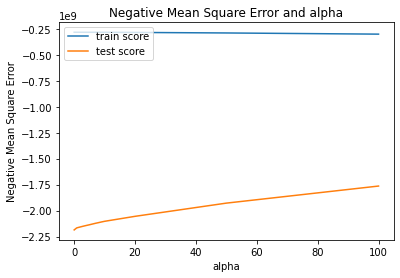

In [1071]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Square Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimum alpha = 100

In [1072]:
# list of alphas to tune vs R2
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1073]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 1000}
Lasso(alpha=1000)
27
0.8046153728842809


In [1074]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198262,0.038976,0.002913,0.000159,0.0001,{'alpha': 0.0001},0.840059,0.544602,0.691753,0.224343,...,0.637650,0.239081,28,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
1,0.185161,0.032526,0.003502,0.000628,0.001,{'alpha': 0.001},0.840060,0.544612,0.691757,0.224347,...,0.637654,0.239079,27,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
2,0.186958,0.020044,0.003569,0.000762,0.01,{'alpha': 0.01},0.840069,0.544719,0.691784,0.224385,...,0.637690,0.239060,26,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
3,0.207413,0.045989,0.003115,0.000230,0.05,{'alpha': 0.05},0.840109,0.545191,0.691866,0.224554,...,0.637841,0.238974,25,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
4,0.181479,0.027006,0.003190,0.000401,0.1,{'alpha': 0.1},0.840160,0.545780,0.691921,0.224769,...,0.638018,0.238861,24,0.957534,0.951915,0.954348,0.954144,0.955656,0.954719,0.001851


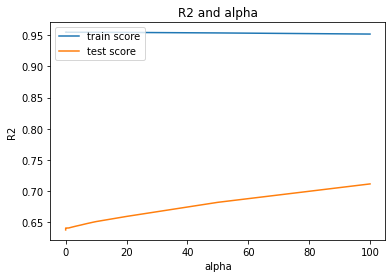

In [1075]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Optimum Alpha = 100

In [1076]:
Lasso_model_score = reg_model_sc(y_train, y_train_pred_lasso, num_fea_lasso, 1021)

In [1077]:
print( "The AIC score for Lasso model              :- ", Lasso_model_score[0])
print( "The BIC score for Lasso model              :- ", Lasso_model_score[1])
print( "The Adjusted R2 score for Lasso model      :- ", Lasso_model_score[2])

The AIC score for Lasso model              :-  20426.070204157073
The BIC score for Lasso model              :-  21421.634843426335
The Adjusted R2 score for Lasso model      :-  0.9474245535926253


#### Model with 2 x Alpha


In [1078]:
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=200)

In [1079]:
coeffs = lasso.coef_

In [1080]:
num_fea_lasso = len([i for i, e in enumerate(coeffs) if e != 0])
num_fea_lasso

178

In [1081]:
y_train_pred_lasso = lasso.predict(X_train)
df_pred_compare_lasso = pd.DataFrame(y_train)
df_pred_compare_lasso['Price_Pred'] = y_train_pred_lasso
df_pred_compare_lasso

,SalePrice,Price_Pred
210,98000,92264.075300
318,260000,333405.882507
239,113000,128401.383263
986,117000,126138.486978
1416,122500,131338.930600
...,...,...
1009,102000,100710.077875
802,189000,190242.714317
53,385000,404879.596059
350,318061,315061.585257


In [1082]:
# list of alphas to tune vs neg_mean_squared_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [1083]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 1000}
Lasso(alpha=1000)
27
-1279810687.9387712


In [1084]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.197505,0.043426,0.004196,0.000990,0.0001,{'alpha': 0.0001},-8.335410e+08,-3.390889e+09,-1.830443e+09,-4.052967e+09,...,-2.186276e+09,1.322814e+09,28,-2.758956e+08,-2.854978e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826899e+08,1.132233e+07
1,0.185976,0.030436,0.003014,0.000074,0.001,{'alpha': 0.001},-8.335363e+08,-3.390810e+09,-1.830424e+09,-4.052947e+09,...,-2.186252e+09,1.322796e+09,27,-2.758956e+08,-2.854978e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826899e+08,1.132233e+07
2,0.182059,0.028072,0.002903,0.000172,0.01,{'alpha': 0.01},-8.334892e+08,-3.390017e+09,-1.830259e+09,-4.052749e+09,...,-2.186012e+09,1.322613e+09,26,-2.758956e+08,-2.854981e+08,-2.888447e+08,-2.981391e+08,-2.650725e+08,-2.826900e+08,1.132237e+07
3,0.178344,0.034084,0.002791,0.000405,0.05,{'alpha': 0.05},-8.332800e+08,-3.386501e+09,-1.829774e+09,-4.051866e+09,...,-2.185006e+09,1.321780e+09,25,-2.758957e+08,-2.854994e+08,-2.888449e+08,-2.981394e+08,-2.650726e+08,-2.826904e+08,1.132251e+07
4,0.179011,0.027522,0.002993,0.000016,0.1,{'alpha': 0.1},-8.330187e+08,-3.382116e+09,-1.829451e+09,-4.050744e+09,...,-2.183817e+09,1.320707e+09,24,-2.758957e+08,-2.855011e+08,-2.888452e+08,-2.981398e+08,-2.650727e+08,-2.826909e+08,1.132270e+07


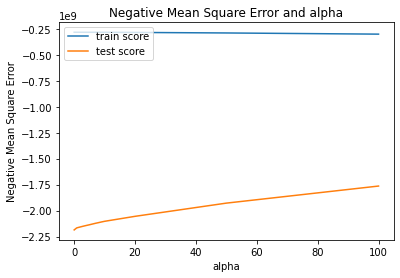

In [1085]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Square Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1086]:
# list of alphas to tune vs R2
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1087]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 1000}
Lasso(alpha=1000)
27
0.8046153728842809


In [1088]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.189175,0.043576,0.003221,0.000389,0.0001,{'alpha': 0.0001},0.840059,0.544602,0.691753,0.224343,...,0.637650,0.239081,28,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
1,0.196736,0.028255,0.003194,0.000398,0.001,{'alpha': 0.001},0.840060,0.544612,0.691757,0.224347,...,0.637654,0.239079,27,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
2,0.189059,0.044052,0.002992,0.000004,0.01,{'alpha': 0.01},0.840069,0.544719,0.691784,0.224385,...,0.637690,0.239060,26,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
3,0.218967,0.045656,0.003795,0.001159,0.05,{'alpha': 0.05},0.840109,0.545191,0.691866,0.224554,...,0.637841,0.238974,25,0.957534,0.951916,0.954348,0.954144,0.955656,0.954719,0.001851
4,0.230525,0.010541,0.003596,0.000795,0.1,{'alpha': 0.1},0.840160,0.545780,0.691921,0.224769,...,0.638018,0.238861,24,0.957534,0.951915,0.954348,0.954144,0.955656,0.954719,0.001851


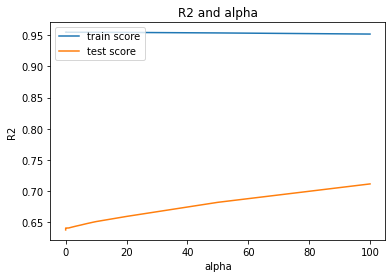

In [1089]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1090]:
Lasso_model_score = reg_model_sc(y_train, y_train_pred_lasso, num_fea_lasso,1021)

In [1091]:
print( "The AIC score for Lasso model              :- ", Lasso_model_score[0])
print( "The BIC score for Lasso model              :- ", Lasso_model_score[1])
print( "The Adjusted R2 score for Lasso model      :- ", Lasso_model_score[2])

The AIC score for Lasso model              :-  20457.49485208363
The BIC score for Lasso model              :-  21334.77458371694
The Adjusted R2 score for Lasso model      :-  0.9431713699684682


In [1092]:
coeffs

array([ 7.70752568e+02,  4.92607786e+03,  1.07627966e+04,  5.85300210e+03,
        9.92435278e+03,  2.59525241e+03,  3.72127491e+03,  5.27516711e+03,
        6.75855868e+02, -0.00000000e+00,  8.80626454e+03,  0.00000000e+00,
        5.52518916e+03, -2.34559927e+03,  2.98426368e+04,  2.14888739e+03,
       -0.00000000e+00,  1.36378887e+03, -2.77974972e+02, -2.56698910e+03,
       -3.83142998e+03,  0.00000000e+00,  8.93069269e+02,  6.81008856e+02,
        5.06623450e+03,  2.42400475e+02,  9.12241067e+02,  9.04520081e+02,
       -0.00000000e+00,  5.26957336e+02,  4.98473622e+02,  2.31301742e+03,
        0.00000000e+00, -3.19507010e+02, -2.38516389e+02,  4.20745849e+02,
        2.41280645e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.50814090e+02, -1.65711546e+02,  0.00000000e+00,
       -9.96503825e+02, -1.50557593e+03, -1.62640588e+03, -0.00000000e+00,
       -1.32149002e+03,  0.00000000e+00,  1.31309003e+02,  1.55778485e+03,
       -0.00000000e+00,  

In [1093]:
coeffs.max()

68969.47295293186

### C. Model Using Elastic Net

In [1094]:
from sklearn.linear_model import ElasticNet
# list of alphas to tune vs neg_mean_absolute_error
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

elasticnet = ElasticNet(l1_ratio=0.5)

# cross validation
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1095]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)
print(model_cv.best_index_)
print(model_cv.best_score_)

{'alpha': 0.8}
ElasticNet(alpha=0.8)
11
-18695.818000037914


In [1096]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.213794,0.056274,0.003889,0.001112,0.0001,{'alpha': 0.0001},-20011.315198,-20972.490835,-21706.450112,-21842.753859,...,-20614.591506,1224.477020,17,-11651.603824,-11411.537735,-11839.197831,-12002.552106,-11546.946440,-11690.367587,209.488881
1,0.187516,0.038720,0.003330,0.000423,0.001,{'alpha': 0.001},-19731.821775,-20863.543245,-21466.653568,-21390.749882,...,-20370.046170,1165.018490,15,-11649.636811,-11410.603314,-11818.466533,-11988.978848,-11544.820594,-11682.501220,203.164760
2,0.194262,0.014131,0.002995,0.000631,0.01,{'alpha': 0.01},-18858.064005,-20566.752013,-20618.049029,-19514.511081,...,-19567.157872,924.122200,13,-11998.865112,-11404.832918,-12025.761934,-12157.444282,-11898.839827,-11897.148814,259.622446
3,0.125729,0.022409,0.003286,0.000392,0.05,{'alpha': 0.05},-18570.264664,-20325.908923,-21008.936618,-18227.431600,...,-19544.556408,1043.174992,12,-13185.466836,-11510.755682,-13131.792502,-13336.582740,-13121.334501,-12857.186452,677.590924
4,0.065572,0.005676,0.003049,0.000110,0.1,{'alpha': 0.1},-18121.029067,-20374.462618,-21161.629970,-17800.398393,...,-19470.076925,1301.212597,11,-13705.662151,-11703.771568,-13557.561814,-13935.705830,-13676.594426,-13315.859158,815.295379
5,0.046714,0.001800,0.002990,0.000005,0.2,{'alpha': 0.2},-17514.608641,-20476.158056,-21093.912360,-17288.951287,...,-19215.180019,1546.561176,10,-14163.232959,-12030.434474,-13886.075875,-14452.461565,-14138.788667,-13734.198708,870.579600
6,0.045815,0.003325,0.002793,0.000400,0.3,{'alpha': 0.3},-17197.924412,-20562.739846,-20981.829753,-16949.215888,...,-19028.387192,1674.614656,8,-14438.978999,-12293.368849,-14066.227669,-14749.932998,-14367.147822,-13983.131267,872.405044
7,0.040176,0.002735,0.003197,0.000742,0.4,{'alpha': 0.4},-16997.307475,-20619.776135,-20872.278047,-16731.337980,...,-18892.124529,1748.489748,7,-14647.294203,-12518.316702,-14199.289072,-14951.159710,-14551.293399,-14173.470617,861.656573
8,0.040028,0.002023,0.003096,0.000133,0.5,{'alpha': 0.5},-16855.536323,-20681.702040,-20798.318932,-16541.565785,...,-18790.120372,1816.031267,6,-14823.793152,-12718.263339,-14311.354243,-15106.514569,-14725.036592,-14336.992379,848.605765
9,0.037270,0.000545,0.003565,0.001367,0.6,{'alpha': 0.6},-16766.533960,-20764.499049,-20768.077093,-16396.347319,...,-18735.698465,1879.252119,5,-14993.396253,-12894.568239,-14422.994675,-15240.321868,-14898.830585,-14490.022324,840.645628


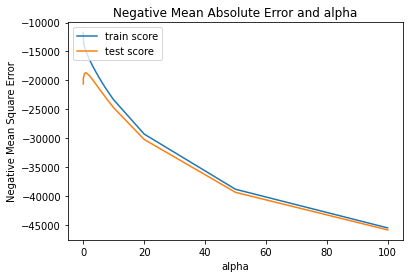

In [1097]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Square Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Balanced Lasso effect

In [1098]:
alpha1 =10

elasticnet = ElasticNet(alpha = alpha1, l1_ratio=0.5)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=10)

In [1099]:
elasticnet.coef_

array([ 1424.38398424,  1392.09639756,  3886.53709773,   385.68277925,
        1419.4629703 ,  1854.07728879,  2355.2142508 ,  1915.49931033,
         224.10018151,   792.6233325 ,  2873.59650097,  3159.17410535,
        1788.7721927 ,  -127.74005686,  3798.78295563,  1229.09224422,
          47.10999713,  2261.89098038,  1255.17735859,   737.95126517,
        -611.61517698,  2583.82854054,  2218.87626016,  1336.36300947,
        2555.53885569,  2573.48657221,  1504.27448011,  1085.11898209,
        -152.24828438,   333.04668604,   529.33385529,   450.16335808,
         -77.15413202,    60.78250873,  -158.03670137,  -757.66034731,
         -12.01646678,  -144.68397248,  -216.86046408,  1228.81700311,
         275.13055047,   153.20644271,  -367.49180738,  -241.72274711,
        -476.18226363,  -200.2576016 ,  -753.43541295,  -340.23520937,
        -371.049905  ,   236.67464901,   -91.78754619,   864.62951965,
        -938.53347817,   250.88701697,   353.57488994,  -401.93234821,
      

In [1100]:
elasticnet.coef_.max()

3886.5370977335638

In [1101]:
coeff = elasticnet.coef_

In [1102]:
print([i for i, e in enumerate(coeff) if e != 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

In [1103]:
num_fea_elasticnet_balanced = len([i for i, e in enumerate(coeff) if e != 0])

In [1104]:
num_fea_elasticnet_balanced

259

In [1105]:
print(num_fea_elasticnet_balanced)

259


In [1106]:
y_train_pred_elacticnet_balanced = elasticnet.predict(X_train)
df_pred_compare_elacticnet_balanced = pd.DataFrame(y_train)
df_pred_compare_elacticnet_balanced['Price_Pred'] = y_train_pred_elacticnet_balanced
df_pred_compare_elacticnet_balanced

,SalePrice,Price_Pred
210,98000,95333.673926
318,260000,279146.384636
239,113000,138897.719629
986,117000,137223.918785
1416,122500,146497.588144
...,...,...
1009,102000,117839.087321
802,189000,210093.746604
53,385000,281993.231031
350,318061,251092.074645


In [1107]:
Elasticnet_balanced_model_score = reg_model_sc(y_train, y_train_pred_elacticnet_balanced, num_fea_elasticnet_balanced, 143)

In [1108]:
print( "The AIC score for Elasticnet model(Balanced)              :- ", Elasticnet_balanced_model_score[0])
print( "The BIC score for Elasticnet model(Balanced)              :- ", Elasticnet_balanced_model_score[1])
print( "The Adjusted R2 score for Elasticnet model(Balanced)      :- ", Elasticnet_balanced_model_score[2])

The AIC score for Elasticnet model(Balanced)              :-  22167.399941422067
The BIC score for Elasticnet model(Balanced)              :-  23443.891236326715
The Adjusted R2 score for Elasticnet model(Balanced)      :-  0.7411864503615633


Reduced Lasso effect

In [1109]:
alpha1 = 10

elasticnet = ElasticNet(alpha = alpha1, l1_ratio=0.2)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=10, l1_ratio=0.2)

In [1110]:
elasticnet.coef_

array([ 1.25837329e+03,  1.13693192e+03,  3.13578621e+03,  1.39917286e+02,
        1.33202765e+03,  1.59203748e+03,  1.92151971e+03,  1.57328833e+03,
        1.48069770e+02,  7.10499636e+02,  2.40608304e+03,  2.57753776e+03,
        1.40467283e+03, -1.18046278e+02,  3.05234285e+03,  9.83347392e+02,
        3.33227717e+01,  1.90980564e+03,  1.04654238e+03,  6.25339963e+02,
       -4.90464174e+02,  2.09723107e+03,  1.87176293e+03,  1.24154133e+03,
        2.15721441e+03,  2.18064191e+03,  1.26186392e+03,  9.55760737e+02,
       -1.87745963e+02,  2.52687200e+02,  4.18170605e+02,  3.99825580e+02,
       -8.12637729e+01,  7.16742995e+01, -1.28017217e+02, -6.75040879e+02,
       -2.77364962e+01, -1.83310956e+02, -2.86663896e+02,  1.11382075e+03,
        1.50017580e+02,  1.13756407e+02, -2.58853769e+02, -2.06448937e+02,
       -3.99642914e+02, -4.35536743e+01, -5.92888194e+02, -2.93076723e+02,
       -2.98523852e+02,  1.98470376e+02, -1.15103401e+02,  7.65837627e+02,
       -8.39993952e+02,  

In [1111]:
elasticnet.coef_.max()

3135.786208045636

In [1112]:
print([i for i, e in enumerate(elasticnet.coef_) if e != 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

In [1113]:
num_fea_elasticnet_reduced = len([i for i, e in enumerate(elasticnet.coef_) if e != 0])


In [1114]:
num_fea_elasticnet_reduced

260

In [1115]:
y_train_pred_elacticnet_reduced = elasticnet.predict(X_train)
df_pred_compare_elacticnet_reduced = pd.DataFrame(y_train)
df_pred_compare_elacticnet_reduced['Price_Pred'] = y_train_pred_elacticnet_reduced
df_pred_compare_elacticnet_reduced

,SalePrice,Price_Pred
210,98000,104991.875481
318,260000,263860.431036
239,113000,143705.914029
986,117000,142437.158249
1416,122500,150029.058576
...,...,...
1009,102000,122646.338655
802,189000,207767.964879
53,385000,262528.836202
350,318061,241628.314742


In [1116]:
Elasticnet_reduced_model_score = reg_model_sc(y_train, y_train_pred_elacticnet_reduced, num_fea_elasticnet_reduced, 143)

In [1117]:
Elasticnet_reduced_model_score

(22385.28981730201, 23666.709650024823, 0.6802442719084546)

In [1118]:
print( "The AIC score for Elascticnet model(Reduced Lasso)              :- ", Elasticnet_reduced_model_score[0])
print( "The BIC score for Elascticnet model(Reduced Lasso)              :- ", Elasticnet_reduced_model_score[1])
print( "The Adjusted R2 score for Elascticnet model(Reduced Lasso)      :- ", Elasticnet_reduced_model_score[2])

The AIC score for Elascticnet model(Reduced Lasso)              :-  22385.28981730201
The BIC score for Elascticnet model(Reduced Lasso)              :-  23666.709650024823
The Adjusted R2 score for Elascticnet model(Reduced Lasso)      :-  0.6802442719084546


Increased Lasso Effect

In [1119]:
alpha1 =   10

elasticnet = ElasticNet(alpha = alpha1, l1_ratio=0.8)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=10, l1_ratio=0.8)

In [1120]:
elasticnet.coef_

array([ 1.44574050e+03,  1.87044455e+03,  5.55796375e+03,  1.16469366e+03,
        1.50351118e+03,  2.36401823e+03,  3.15327171e+03,  2.45791977e+03,
        4.17413341e+02,  8.93277005e+02,  3.61421552e+03,  4.24673249e+03,
        2.66749073e+03, -2.00558267e+02,  5.32352786e+03,  1.72706790e+03,
        7.36860542e+01,  2.91659884e+03,  1.62835765e+03,  7.91417481e+02,
       -9.72087577e+02,  3.44700116e+03,  2.70832706e+03,  1.38136209e+03,
        3.30942949e+03,  3.19367867e+03,  1.86946979e+03,  1.19183620e+03,
       -6.84418880e+01,  5.46044894e+02,  7.61507049e+02,  4.22742031e+02,
       -4.09349474e+01, -1.05163003e+01, -2.26666052e+02, -8.19527645e+02,
        5.89767382e+01, -2.61251383e+01,  2.66526942e+01,  1.25085111e+03,
        5.46346077e+02,  1.97201977e+02, -6.24305227e+02, -2.83607506e+02,
       -6.61192591e+02, -6.91138150e+02, -1.08259585e+03, -3.95842347e+02,
       -5.96020992e+02,  3.84321741e+02, -0.00000000e+00,  1.00731932e+03,
       -1.06614880e+03,  

In [1121]:
elasticnet.coef_.max()

5557.963746807436

In [1122]:
num_fea_elasticnet_increased = len([i for i, e in enumerate(elasticnet.coef_) if e != 0])

In [1123]:
num_fea_elasticnet_increased

259

In [1124]:
y_train_pred_elacticnet_increased = elasticnet.predict(X_train)
df_pred_compare_elacticnet_increased = pd.DataFrame(y_train)
df_pred_compare_elacticnet_increased['Price_Pred'] = y_train_pred_elacticnet_increased
df_pred_compare_elacticnet_increased

,SalePrice,Price_Pred
210,98000,82305.273955
318,260000,304099.710025
239,113000,133091.439430
986,117000,129591.018873
1416,122500,141103.616763
...,...,...
1009,102000,114701.694827
802,189000,210653.505812
53,385000,320255.273314
350,318061,265579.141158


In [1125]:
Elasticnet_increased_model_score = reg_model_sc(y_train, y_train_pred_elacticnet_increased, num_fea_elasticnet_increased, 143)

In [1126]:
print( "The AIC score for Elascticnet model(Increased Lasso)              :- ", Elasticnet_increased_model_score[0])
print( "The BIC score for Elascticnet model(Increased Lasso)              :- ", Elasticnet_increased_model_score[1])
print( "The Adjusted R2 score for Elascticnet model(Increased Lasso)      :- ", Elasticnet_increased_model_score[2])

The AIC score for Elascticnet model(Increased Lasso)              :-  21793.556993896702
The BIC score for Elascticnet model(Increased Lasso)              :-  23070.04828880135
The Adjusted R2 score for Elascticnet model(Increased Lasso)      :-  0.8205396669929779


Complete Lasso Effect

In [1127]:
alpha1 =10

elasticnet = ElasticNet(alpha = alpha1, l1_ratio=1)
        
elasticnet.fit(X_train, y_train) 

ElasticNet(alpha=10, l1_ratio=1)

In [1128]:
elasticnet.coef_

array([ 2.28990287e+03,  6.88525718e+03,  9.31867653e+03,  6.64358179e+03,
        1.24109228e+04,  2.30509386e+03,  3.96520107e+03,  7.90171040e+03,
        1.63339564e+03, -0.00000000e+00,  1.27020080e+04,  1.52416930e+04,
        2.80101024e+04, -7.54147575e+02,  8.70330079e+03,  1.13247143e+03,
       -2.37781543e+02,  4.93676447e+02, -1.86158213e+03, -2.79655891e+03,
       -3.16504649e+03, -5.46956120e+02,  2.08680449e+03,  1.18067971e+03,
        3.54734449e+03,  1.52425683e+03,  1.16894034e+03,  1.34893245e+03,
       -9.63140244e+01,  5.29183606e+02,  6.28798335e+02,  4.85940418e+03,
        2.73300492e+02, -5.76451501e+02, -7.92810887e+02,  1.29118034e+03,
        5.40279115e+02, -6.35433801e+02, -2.95095348e+02,  2.49729381e+03,
        1.12463533e+03, -2.23476493e+03, -8.61145394e+02, -1.09089406e+03,
       -2.69255305e+03, -9.73193286e+02, -4.47511616e+02, -1.85953562e+02,
       -1.85630151e+03,  5.26935087e+03,  2.44695109e+03,  1.06892291e+04,
        7.62513518e+03,  

In [1129]:
elasticnet.coef_.max()

100736.00217940198

In [1130]:
alpha1 =10

elasticnet = ElasticNet(alpha = alpha1, l1_ratio=1)
        
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=10, l1_ratio=1)

In [1131]:
elasticnet.coef_

array([ 2.28990287e+03,  6.88525718e+03,  9.31867653e+03,  6.64358179e+03,
        1.24109228e+04,  2.30509386e+03,  3.96520107e+03,  7.90171040e+03,
        1.63339564e+03, -0.00000000e+00,  1.27020080e+04,  1.52416930e+04,
        2.80101024e+04, -7.54147575e+02,  8.70330079e+03,  1.13247143e+03,
       -2.37781543e+02,  4.93676447e+02, -1.86158213e+03, -2.79655891e+03,
       -3.16504649e+03, -5.46956120e+02,  2.08680449e+03,  1.18067971e+03,
        3.54734449e+03,  1.52425683e+03,  1.16894034e+03,  1.34893245e+03,
       -9.63140244e+01,  5.29183606e+02,  6.28798335e+02,  4.85940418e+03,
        2.73300492e+02, -5.76451501e+02, -7.92810887e+02,  1.29118034e+03,
        5.40279115e+02, -6.35433801e+02, -2.95095348e+02,  2.49729381e+03,
        1.12463533e+03, -2.23476493e+03, -8.61145394e+02, -1.09089406e+03,
       -2.69255305e+03, -9.73193286e+02, -4.47511616e+02, -1.85953562e+02,
       -1.85630151e+03,  5.26935087e+03,  2.44695109e+03,  1.06892291e+04,
        7.62513518e+03,  

In [1132]:
elasticnet.coef_.max()

100736.00217940198

In [1133]:
num_fea_elasticnet_complete = len([i for i, e in enumerate(elasticnet.coef_) if e != 0])

In [1134]:
num_fea_elasticnet_complete

248

In [1135]:
parameter = ['AIC', 'BIC' , 'Adjusted R2']
compare_model = pd.DataFrame(parameter, columns = ['Parameter'])

In [1136]:
compare_model ['Ridge'] =  Ridge_model_score
compare_model ['Lasso'] =  Lasso_model_score
compare_model ['ElasticNet(Balanced)'] =  Elasticnet_balanced_model_score
compare_model ['ElasticNet(Reduced Lasso)'] =  Elasticnet_reduced_model_score
compare_model ['ElasticNet(Increased Lasso)'] = Elasticnet_increased_model_score

In [1137]:
compare_model

,Parameter,Ridge,Lasso,ElasticNet(Balanced),ElasticNet(Reduced Lasso),ElasticNet(Increased Lasso)
0,AIC,20882.351655,20457.494852,22167.399941,22385.289817,21793.556994
1,BIC,22168.700026,21334.774584,23443.891236,23666.709650,23070.048289
2,Adjusted R2,0.926772,0.943171,0.741186,0.680244,0.820540


Conclusion

Lasso has lowest AIC and highest Adjusted R2 of 0.943171. Ridge has AIC slightly higher than Lasso. Elastic net results are poor compared 
to ridge and lasso. 
By coparing all scores, lasso looks to be performing better than other models.